<a href="https://colab.research.google.com/github/wahida-sci/XAI-Project/blob/main/XAI_Feature_importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## eXplainable Artificial Intelligence (XAI)- Feature importances

🔍 Goal: Predict whether a patient has diabetes and identify which features (factors) contribute most to the prediction.

🧠 Method: Built a predictive model using Random Forest, a robust machine learning algorithm, and incorporated explainability tools to uncover why the model makes its decisions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##Data declaration

Data source: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data

##Data Dictionary:

Pregnancies: Indicates the total number of times the individual has been pregnant

Glucose: Represents the concentration of glucose in the blood

BloodPressure: Refers to the measured blood pressure level

SkinThickness: Denotes the measured thickness of the skin

Insulin: Represents the insulin concentration in the blood

BMI: Indicates the Body Mass Index, a measure of body fat based on height and weight

DiabetesPedigreeFunction: Reflects the likelihood of diabetes based on family history

Age: Refers to the individual’s age in years

Outcome: Shows the diagnosis result — 1 for positive (Yes) and 0 for negative (No)

The data is complete and does not required pre-processing process

In [ ]:
# Loading needed libraries

import pandas as pd #import pandas to read the data into data frame
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Reading the datasets

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Identifying the data shape (row,column)

df.shape

(768, 9)

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.25, random_state=20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576, 1)
(192, 1)


In [ ]:
# Feature Scaling

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [ ]:
# Train the model

forest = RandomForestClassifier()
forest.fit(X_train_std, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]
importances = forest.feature_importances_
importances

array([0.09091918, 0.25340703, 0.09097025, 0.06989521, 0.07100142,
       0.16658293, 0.11735058, 0.13987339])

Text(0.5, 0, 'Random Forest Feature Importance')

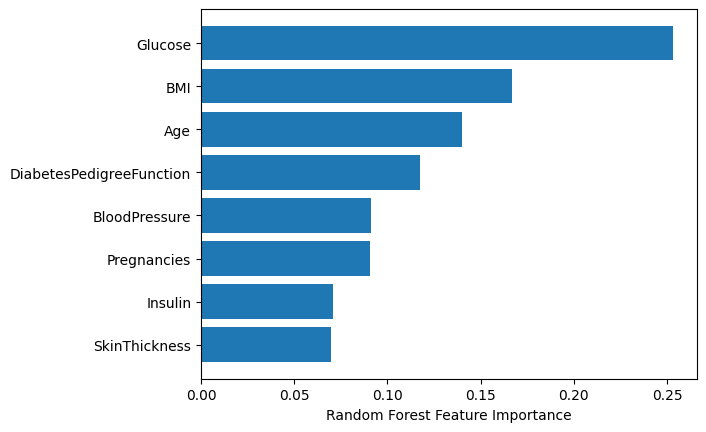

In [ ]:
# Plot the feature importance

import matplotlib.pyplot as plt

sorted_indices = forest.feature_importances_.argsort()
plt.barh(range(X_train.shape[1]), forest.feature_importances_[sorted_indices])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation= 360)
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# Print the features importance values

for i, v in enumerate(importances):
    print('{} Score: {:.2f}'.format(cols[i], v))

Pregnancies Score: 0.09
Glucose Score: 0.25
BloodPressure Score: 0.09
SkinThickness Score: 0.07
Insulin Score: 0.07
BMI Score: 0.17
DiabetesPedigreeFunction Score: 0.12
Age Score: 0.14


# Conclusion and Recommendation

Based on the feature importance scores derived from the model, it is evident that glucose level plays the most significant role in predicting a patients to experience diabetes, with a score of 0.25, substantially higher than other variables. This insight, provided by the XAI framework, enhances the transparency of the model’s decision-making process by highlighting which features most strongly influence the prediction outcomes.

Therefore, it is recommended that healthcare professionals place a stronger emphasis on monitoring and managing patients' glucose levels, particularly in high-risk individuals. Early detection and control of abnormal glucose levels could significantly reduce the risk of developing diabetes.

Additionally, Body Mass Index (BMI) and age also show moderate influence, with scores of 0.17 and 0.14 respectively, indicating that lifestyle factors and aging should also be considered in preventative care strategies.

Embedding XAI as feature importances in this context proves valuable in not only providing accurate predictions but also explaining the underlying reasoning, which supports trust, accountability, and actionable decision-making in clinical practice. Moving forward, integrating XAI into healthcare decision-support systems can enhance the personalization of treatment plans and improve patient outcomes.